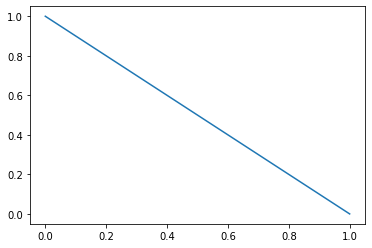

/home/russell/safe2/neuronunit/neuronunit/optimisation/optimization_management.py:8: UserWarning: X11 plotting backend not available, consider installing
  warnings.warn('X11 plotting backend not available, consider installing')


consider installing pynn a heavier backend


INFO       Cache size for target "cython": 4765 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "/home/russell/.cython/brian_extensions" directory. [brian2]


pynn python Error
glif python Error
/home/russell/safe2/neuronunit/neuronunit/tests/multicellular_constraints.p


In [1]:
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
plt.show()
from neuronunit.optimisation.optimization_management import inject_and_plot_model, dtc_to_rheo, inject_and_plot_passive_model
import numpy as np
from neuronunit.optimisation.data_transport_container import DataTC


In [ ]:
from neuronunit.optimisation import model_parameters
model_parameters.MODEL_PARAMS.keys()
backends = ["RAW", "ADEXP", "HH","BHH"]#"GLIF","NEURON"]
fig, axs = plt.subplots(len(backends)+1,figsize=(40, 40))
cnt=0
for b in backends:
    raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[b].items()}
    pre_model = DataTC()
    if str("V_REST") in raw_attrs.keys():
        raw_attrs["V_REST"] = -75.0
    pre_model.attrs = raw_attrs

    pre_model.backend = b
    

    vm,_ = inject_and_plot_passive_model(raw_attrs,b)
    #axs[cnt].clf()
    axs[cnt].plot(vm.times,vm.magnitude)
    axs[cnt].set_title(b)

    cnt+=1
#fig.show()  

In [ ]:
from neuronunit.optimisation import model_parameters
model_parameters.MODEL_PARAMS.keys()
backends = ["RAW", "ADEXP", "HH","BHH"]
fig, axs = plt.subplots(len(backends)+1,figsize=(30, 30))
cnt=0
for b in backends:
    print(b)
    raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[b].items()}
    pre_model = DataTC()
    if str("V_REST") in raw_attrs.keys():
        raw_attrs["V_REST"] = -75.0

    pre_model.attrs = raw_attrs
    pre_model.backend = b
    dtc = dtc_to_rheo(pre_model)
    print(dtc.rheobase)
    
    vm,_ = inject_and_plot_model(raw_attrs,b)
    #vm,_ = inject_and_plot_passive_model(raw_attrs,b)
    axs[cnt].plot(vm.times,vm.magnitude)
    axs[cnt].set_title(b)

    cnt+=1
#fig.show()  
    #inject_and_plot_passive_model(raw_attrs,b)


In [4]:
import brian2 as b2

b2.A = 1000000000000*b2.pA

In [5]:
from neuronunit.optimisation import model_parameters
model_parameters.MODEL_PARAMS.keys()
backend = "RAW"
raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[backend].items()}


{'amplitude': array(0.16132593154907227) * pA, 'duration': array(1000.0) * ms, 'delay': array(100.0) * ms}


(AnalogSignal with 1 channels of length 260000; units mV; datatype float64 
 sampling rate: 200.0 1/ms
 time: 0.0 s to 1.3 s,
 <module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>)

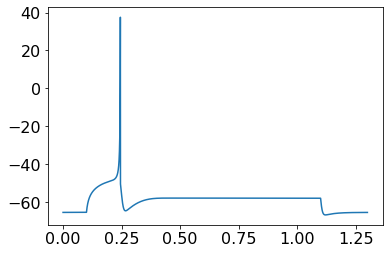

In [6]:
inject_and_plot_model(raw_attrs,backend)


In [7]:
pre_model.rheobase

array(3.408712148666382) * pA

In [8]:

from neuronunit.optimisation.optimization_management import TSD
from neuronunit.optimisation.optimization_management import OptMan
from neuronunit.optimisation import mint_tests

import os
import pickle
electro_path = str(os.getcwd())+'/../tests/multicellular_constraints.p'
print(electro_path)
os.path.isfile(electro_path)
assert os.path.isfile(electro_path) == True
with open(electro_path,'rb') as f:
    test_frame = pickle.load(f)
filtered_tests = {key:val for key,val in test_frame.items()}
filtered_tests.keys()

/home/russell/safe2/neuronunit/neuronunit/examples/../tests/multicellular_constraints.p


dict_keys(['Cerebellum Purkinje cell', 'Neocortex pyramidal cell layer 5-6'])

In [ ]:

try:
    assert os.path.isfile(electro_path) == True
    with open(electro_path,'rb') as f:
        test_frame = pickle.load(f)
    filtered_tests = {key:val for key,val in test_frame.items()}
except:
    
    filtered_tests = mint_tests.get_cell_constraints()

def precursive_testing(test_frame):
    NGEN = 8
    MU = 4
    
    tests= test_frame['Neocortex pyramidal cell layer 5-6']
    tests['name'] = 'Neocortex pyramidal cell layer 5-6'
    place_holder = TSD(tests,use_rheobase_score=True)
    OM = OptMan(ca1,protocol={'elephant':True,'allen':False})
    out = OM.simulated_data_tests(place_holder,backend,model_parameters.MODEL_PARAMS[backend], NGEN=NGEN, MU=MU)
    return out
out = precursive_testing(filtered_tests)

> /home/russell/safe2/neuronunit/neuronunit/optimisation/optimization_management.py(215)__init__()
-> super(TSD,self).__init__(tests)


(Pdb)  tests


{'Injected current AP width test': <neuronunit.tests.waveform.InjectedCurrentAPWidthTest object at 0x7ff0f1cb2f60>, 'Injected current AP threshold test': <neuronunit.tests.waveform.InjectedCurrentAPThresholdTest object at 0x7ff0f1cb2080>, 'Resting potential test': <neuronunit.tests.passive.RestingPotentialTest object at 0x7ff0f1cb2588>, 'Input resistance test': <neuronunit.tests.passive.InputResistanceTest object at 0x7ff0f1cb2898>, 'Injected current AP amplitude test': <neuronunit.tests.waveform.InjectedCurrentAPAmplitudeTest object at 0x7ff0f1cb27f0>, 'Time constant test': <neuronunit.tests.passive.TimeConstantTest object at 0x7ff0f1cb2c88>, 'Rheobase test': <neuronunit.tests.fi.RheobaseTest object at 0x7ff0f1cb26a0>, 'Capacitance test': <neuronunit.tests.passive.CapacitanceTest object at 0x7ff0f2b02dd8>, 'name': 'Neocortex pyramidal cell layer 5-6'}


(Pdb)  dir()


['__class__', 'pdb', 'self', 'tests', 'use_rheobase_score']


(Pdb)  super(TSD,self).__init__(tests)


*** TypeError: Test suite was not provided with a test or iterable.


(Pdb)  super(TSD,self).__init__(tests)


*** TypeError: Test suite was not provided with a test or iterable.


(Pdb)  tests


{'Injected current AP width test': <neuronunit.tests.waveform.InjectedCurrentAPWidthTest object at 0x7ff0f1cb2f60>, 'Injected current AP threshold test': <neuronunit.tests.waveform.InjectedCurrentAPThresholdTest object at 0x7ff0f1cb2080>, 'Resting potential test': <neuronunit.tests.passive.RestingPotentialTest object at 0x7ff0f1cb2588>, 'Input resistance test': <neuronunit.tests.passive.InputResistanceTest object at 0x7ff0f1cb2898>, 'Injected current AP amplitude test': <neuronunit.tests.waveform.InjectedCurrentAPAmplitudeTest object at 0x7ff0f1cb27f0>, 'Time constant test': <neuronunit.tests.passive.TimeConstantTest object at 0x7ff0f1cb2c88>, 'Rheobase test': <neuronunit.tests.fi.RheobaseTest object at 0x7ff0f1cb26a0>, 'Capacitance test': <neuronunit.tests.passive.CapacitanceTest object at 0x7ff0f2b02dd8>, 'name': 'Neocortex pyramidal cell layer 5-6'}


(Pdb)  tests.to_list()


*** AttributeError: 'dict' object has no attribute 'to_list'


(Pdb)  dir(tests)


['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


(Pdb)  list(test.values())


*** Error in argument: '(test.values())'


(Pdb)  list(tests.values())


*** Error in argument: '(tests.values())'


(Pdb)  tests


{'Injected current AP width test': <neuronunit.tests.waveform.InjectedCurrentAPWidthTest object at 0x7ff0f1cb2f60>, 'Injected current AP threshold test': <neuronunit.tests.waveform.InjectedCurrentAPThresholdTest object at 0x7ff0f1cb2080>, 'Resting potential test': <neuronunit.tests.passive.RestingPotentialTest object at 0x7ff0f1cb2588>, 'Input resistance test': <neuronunit.tests.passive.InputResistanceTest object at 0x7ff0f1cb2898>, 'Injected current AP amplitude test': <neuronunit.tests.waveform.InjectedCurrentAPAmplitudeTest object at 0x7ff0f1cb27f0>, 'Time constant test': <neuronunit.tests.passive.TimeConstantTest object at 0x7ff0f1cb2c88>, 'Rheobase test': <neuronunit.tests.fi.RheobaseTest object at 0x7ff0f1cb26a0>, 'Capacitance test': <neuronunit.tests.passive.CapacitanceTest object at 0x7ff0f2b02dd8>, 'name': 'Neocortex pyramidal cell layer 5-6'}


(Pdb)  tests.values


<built-in method values of dict object at 0x7ff0f0f5b948>


(Pdb)  tests.values()


dict_values([<neuronunit.tests.waveform.InjectedCurrentAPWidthTest object at 0x7ff0f1cb2f60>, <neuronunit.tests.waveform.InjectedCurrentAPThresholdTest object at 0x7ff0f1cb2080>, <neuronunit.tests.passive.RestingPotentialTest object at 0x7ff0f1cb2588>, <neuronunit.tests.passive.InputResistanceTest object at 0x7ff0f1cb2898>, <neuronunit.tests.waveform.InjectedCurrentAPAmplitudeTest object at 0x7ff0f1cb27f0>, <neuronunit.tests.passive.TimeConstantTest object at 0x7ff0f1cb2c88>, <neuronunit.tests.fi.RheobaseTest object at 0x7ff0f1cb26a0>, <neuronunit.tests.passive.CapacitanceTest object at 0x7ff0f2b02dd8>, 'Neocortex pyramidal cell layer 5-6'])


In [ ]:
from sciunit import TestSuite
from types import MethodType

def optimize_selection(cell_id,backend): 
    #code; 
    NGEN = 8
    MU = 4
    tests= self.test_frame['Hippocampus CA1 pyramidal cell']
    tests['name'] = 'Hippocampus CA1 pyramidal cell'
    a = TestSuite(tests)

    a.optimize = MethodType(optimize,a)
    tests = TSD(tests = tests,use_rheobase_score=True)
    tests.optimize(param_edges,backend=None,protocol={'allen': False, 'elephant': True},\
        MU=5,NGEN=5,free_params=None,seed_pop=None,hold_constant=None)

    return optimized_models, passive_vm, spiking_vm, observations, predictions 
